In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

from pmdarima import auto_arima 
   
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../data/train.csv', index_col=0, parse_dates=[0]).interpolate("linear")

<Axes: xlabel='id'>

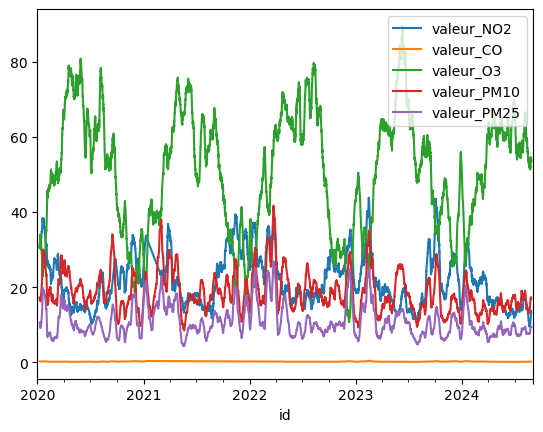

In [3]:
# ETS Decomposition 
df_seasonal = df.apply(lambda x: seasonal_decompose(x, model='additive', period=365).trend)
  
# ETS plot  
df_seasonal.plot()

In [4]:
# Fit auto_arima function to dataset 
stepwise_fit = auto_arima(df['valeur_NO2'], seasonal=True, trace=True) 
  
# To print the summary 
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=246982.034, Time=32.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=255316.779, Time=0.69 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=251212.092, Time=1.54 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=251135.452, Time=2.60 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=255314.779, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=250988.316, Time=11.93 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=247103.996, Time=16.40 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=247106.918, Time=17.67 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=43.85 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=251028.087, Time=3.57 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=247521.345, Time=27.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=247006.137, Time=21.81 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=246948.213, Time=53.49 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=246946.227, Time=83.26 sec
 AR

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                40991
Model:               SARIMAX(4, 1, 1)   Log Likelihood             -123460.593
Date:                Wed, 30 Oct 2024   AIC                         246933.186
Time:                        19:06:19   BIC                         246984.913
Sample:                    01-01-2020   HQIC                        246949.541
                         - 09-03-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1789      0.003    381.038      0.000       1.173       1.185
ar.L2         -0.3404      0.004    -94.697      0.000      -0.347      -0.333
ar.L3         -0.0059      0.004     -1.431      0.152      -0.014       0.002
ar.L4         -0.0464      0.003    -14.077      0.000      -0.053      -0.040
ma.L1         -0.9445      0.002   -488.482      0.000      -0.948      -0.941
sigma2        24.1922      0.067    362.765      0.000      24.062      24.323
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            238257.86
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.32   Skew:                             0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
# Split data into train / test sets 
train = df.iloc[:len(df)-8760] 
test = df.iloc[len(df)-8760:] # Set one year(8760 hours) for testing 
  
# Fit a SARIMAX(2, 1, 2) on the training set 
model = SARIMAX(train['valeur_NO2'],  
                order = (4, 1, 1),
                seasonal_order=(0, 0, 0, 0))
  
result = model.fit() 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             valeur_NO2   No. Observations:                32231
Model:               SARIMAX(4, 1, 1)   Log Likelihood              -96229.048
Date:                Wed, 30 Oct 2024   AIC                         192470.096
Time:                        19:06:49   BIC                         192520.379
Sample:                    01-01-2020   HQIC                        192486.175
                         - 09-04-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2039      0.004    314.260      0.000       1.196       1.211
ar.L2         -0.3897      0.005    -80.430      0.000      -0.399      -0.380
ar.L3          0.0257      0.005      4.876      0.000       0.015       0.036
ar.L4         -0.0573      0.004    -14.576      0.000      -0.065      -0.050
ma.L1         -0.9395      0.002   -396.022      0.000      -0.944      -0.935
sigma2        22.9542      0.080    288.369      0.000      22.798      23.110
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            110486.99
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.31   Skew:                             0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='id'>

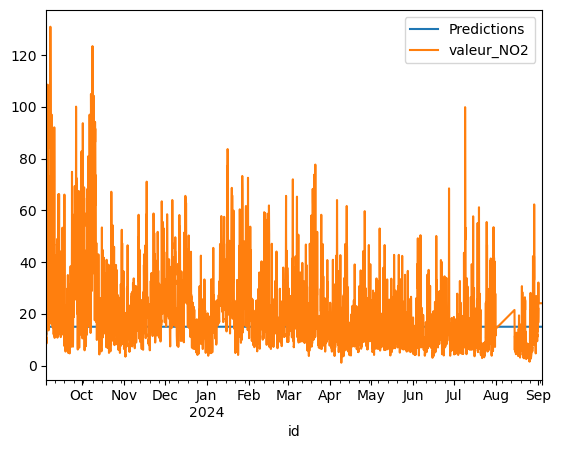

In [ ]:
start = len(train) 
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set 
predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
# plot predictions and actual values 
predictions.plot(legend = True) 
test['valeur_NO2'].plot(legend = True)